In [10]:
import pdb

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:

# モデル
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb


In [12]:
df = pd.read_csv("train.csv", )
df_test = pd.read_csv("test.csv")
df_submit = pd.read_csv("sample_submit.csv", header=None)

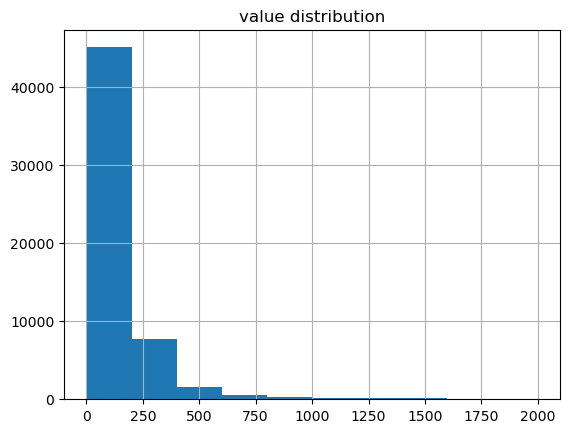

In [13]:
plt.figure()
# plt.subplot(1,2,1)
df['y'].hist()
# plt.subplot(1,2,2)
plt.title("value distribution")
# df_test['y'].hist()
plt.show()

In [14]:
# 前処理
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV

def data_pre(df: pd.DataFrame) -> pd.DataFrame:
    min_max_scaler = MinMaxScaler()
    stand_scaler = StandardScaler()
    imputer = SimpleImputer(strategy='mean')
    
    bed_type_dict = {
        "Real Bed" : 5,
        "Futon" : 4,
        "Pull-out Sofa" : 3,
        "Airbed" : 2,
        "Couch" : 1
    }
    df["bed_type"].replace(bed_type_dict, inplace=True)
    df.drop(columns=["id", "thumbnail_url"], inplace=True)
    
    # 数値データのみ
    df = df.select_dtypes(include=[float, int])
    # 欠損値と平均値で補完、正規化
    column_names = df.columns
    df = imputer.fit_transform(df)
    df = pd.DataFrame(min_max_scaler.fit_transform(df), columns=column_names)
    return df

In [15]:
x_train = data_pre(df.drop('y', axis=1))
y_train = df['y']

/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

In [16]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
trains = lgb.Dataset(X_train, Y_train)
valids = lgb.Dataset(X_valid, Y_valid)

In [17]:
# モデルのパラメータ設定
params = {
    "objective": "regression",
    "metrics": "mae"
}
# モデル学習
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100)


/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 38908, number of used features: 9
[LightGBM] [Info] Start training from score 160.541046
[1]	valid_0's l1: 92.0081
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 87.7269
[3]	valid_0's l1: 84.2497
[4]	valid_0's l1: 81.1793
[5]	valid_0's l1: 78.5696
[6]	valid_0's l1: 76.2909
[7]	valid_0's l1: 74.5351
[8]	valid_0's l1: 72.9401
[9]	valid_0's l1: 71.5273
[10]	valid_0's l1: 70.1319
[11]	valid_0's l1: 69.0205
[12]	valid_0's l1: 68.0484
[13]	valid_0's l1: 67.1734
[14]	valid_0's l1: 66.4985
[15]	valid_0's l1: 65.7669
[16]	valid_0's l1: 65.2856
[17]	valid_0's l1: 64.8208
[18]	valid_0's l1: 64.2328
[19]	valid_0's l1: 63.6967
[20]	valid_0's l1: 63.377

In [18]:
# 推論
predict = model.predict(data_pre(df_test))
df_submit[1] = predict
df_submit.to_csv("output.csv", header=False, index=False)

/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/yoshimura/anaconda3/envs/dataAna/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec